## Statistical analysis of symptom's change

In [1]:
%config Completer.use_jedi = False
import pymc as pm
import numpy as np
import pandas as pd
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
import arviz as az

In [35]:
# load file
df = pd.read_csv('KPE_bdi_pcl.csv') 
df.head()

,scr_id,scr_dem_gender,scr_dem_age,redcap_event_name_y,pcl5_1,pcl5_2,pcl5_3,pcl5_4,pcl5_5,pcl5_6,...,bdi_14_worthlessness,bdi_15_lossofenergy,bdi_16_sleepingpattern,bdi_17_irritability,bdi_18_changesinappetite,bdi_19_concentrationdiff,bdi_20_tirednessfatigue,bdi_21_interestinsex,bdi_total,med_cond
0,KPE008,1.0,51.0,screening_selfrepo_arm_1,2.0,1.0,1.0,4.0,4.0,4.0,...,3.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0,57.0,Ket
1,KPE008,1.0,51.0,visit_1_arm_1,3.0,1.0,1.0,4.0,4.0,4.0,...,3.0,3.0,3.0,3.0,4.0,4.0,3.0,2.0,54.0,Ket
2,KPE008,1.0,51.0,visit_7_week_follo_arm_1,4.0,2.0,1.0,4.0,4.0,4.0,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,52.0,Ket
3,KPE008,1.0,51.0,30_day_follow_up_s_arm_1,4.0,3.0,1.0,4.0,4.0,1.0,...,3.0,4.0,7.0,4.0,4.0,4.0,4.0,3.0,69.0,Ket
4,KPE008,1.0,51.0,90_day_follow_up_s_arm_1,2.0,2.0,1.0,2.0,3.0,3.0,...,3.0,4.0,4.0,1.0,2.0,4.0,4.0,1.0,51.0,Ket


In [38]:
# change names of redcap_enet_name_y
categories_old = ['screening_selfrepo_arm_1', 'visit_1_arm_1','visit_7_week_follo_arm_1',
                  '30_day_follow_up_s_arm_1', '90_day_follow_up_s_arm_1']
categoriesNew=['screen','beforeTrt','afterTrt','FU30','FU90']
cat = pd.Categorical(df.redcap_event_name_y, categories=categories_old)
# set new variable with new categories names
df['time'] = cat.rename_categories(categoriesNew)
df = df.drop('redcap_event_name_y', axis=1) # remove old naming

In [39]:
df.head()

,scr_id,scr_dem_gender,scr_dem_age,pcl5_1,pcl5_2,pcl5_3,pcl5_4,pcl5_5,pcl5_6,pcl5_7,...,bdi_15_lossofenergy,bdi_16_sleepingpattern,bdi_17_irritability,bdi_18_changesinappetite,bdi_19_concentrationdiff,bdi_20_tirednessfatigue,bdi_21_interestinsex,bdi_total,med_cond,time
0,KPE008,1.0,51.0,2.0,1.0,1.0,4.0,4.0,4.0,4.0,...,3.0,3.0,3.0,4.0,3.0,3.0,2.0,57.0,Ket,screen
1,KPE008,1.0,51.0,3.0,1.0,1.0,4.0,4.0,4.0,4.0,...,3.0,3.0,3.0,4.0,4.0,3.0,2.0,54.0,Ket,beforeTrt
2,KPE008,1.0,51.0,4.0,2.0,1.0,4.0,4.0,4.0,4.0,...,3.0,3.0,3.0,2.0,3.0,3.0,3.0,52.0,Ket,afterTrt
3,KPE008,1.0,51.0,4.0,3.0,1.0,4.0,4.0,1.0,1.0,...,4.0,7.0,4.0,4.0,4.0,4.0,3.0,69.0,Ket,FU30
4,KPE008,1.0,51.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,...,4.0,4.0,1.0,2.0,4.0,4.0,1.0,51.0,Ket,FU90


In [40]:
df = df[(df.time!='screen')]
# generate for something else
df_med = df[(df.time=='beforeTrt')][['scr_id','med_cond', 'scr_dem_gender', 'scr_dem_age']]
df_med.groupby('med_cond').sum()

,scr_id,scr_dem_gender,scr_dem_age
med_cond,,,
Ket,KPE008KPE1223KPE1293KPE1307KPE1315KPE1322KPE13...,9.0,529.0
Mid,KPE1253KPE1263KPE1351KPE1356KPE1364KPE1369KPE1...,7.0,456.0


In [6]:
pg.chi2_independence(df_med,'scr_dem_gender','med_cond')

/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


(med_cond        Ket  Mid
 scr_dem_gender          
 0.0             5.0  5.0
 1.0             8.0  8.0,
 med_cond        Ket  Mid
 scr_dem_gender          
 0.0             4.5  5.5
 1.0             8.5  7.5,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  0.162500  1.0  0.686865  0.079057  0.068815
 1        cressie-read  0.666667  0.162546  1.0  0.686823  0.079068  0.068820
 2      log-likelihood  0.000000  0.162708  1.0  0.686675  0.079108  0.068839
 3       freeman-tukey -0.500000  0.162891  1.0  0.686509  0.079152  0.068861
 4  mod-log-likelihood -1.000000  0.163126  1.0  0.686295  0.079209  0.068888
 5              neyman -2.000000  0.163755  1.0  0.685722  0.079362  0.068962)

In [7]:
# age 
df_med.describe()

,scr_dem_gender,scr_dem_age
count,26.000000,26.000000
mean,0.615385,37.884615
std,0.496139,10.723160
min,0.000000,24.000000
25%,0.000000,29.000000
50%,1.000000,36.500000
75%,1.000000,47.000000
max,1.000000,63.000000


## Demographics

In [8]:
df.groupby(['med_cond','time']).describe()

/var/folders/b9/lbb6xc5s5cbgvhhqy321k9th0000gn/T/ipykernel_11689/3156638112.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['med_cond','time']).describe()


scr_dem_gender                                           \
                            count      mean       std  min   25%  50%  75%   
med_cond time                                                                
Ket      beforeTrt           13.0  0.692308  0.480384  0.0  0.00  1.0  1.0   
         afterTrt            14.0  0.714286  0.468807  0.0  0.25  1.0  1.0   
         FU30                13.0  0.692308  0.480384  0.0  0.00  1.0  1.0   
         FU90                11.0  0.636364  0.504525  0.0  0.00  1.0  1.0   
Mid      beforeTrt           13.0  0.538462  0.518875  0.0  0.00  1.0  1.0   
         afterTrt            13.0  0.538462  0.518875  0.0  0.00  1.0  1.0   
         FU30                11.0  0.545455  0.522233  0.0  0.00  1.0  1.0   
         FU90                11.0  0.545455  0.522233  0.0  0.00  1.0  1.0   

                        scr_dem_age             ... bdi_21_interestinsex       \
                    max       count       mean  ...                  75%  max   
med_cond time                                   ...                             
Ket      beforeTrt  1.0        13.0  40.692308  ...                  3.0  3.0   
         afterTrt   1.0        14.0  39.928571  ...                  2.0  4.0   
         FU30       1.0        13.0  39.000000  ...                  3.0  3.0   
         FU90       1.0        11.0  40.909091  ...                  2.0  2.0   
Mid      beforeTrt  1.0        13.0  35.076923  ...                  3.0  3.0   
         afterTrt   1.0        13.0  35.076923  ...                  2.0  3.0   
         FU30       1.0        11.0  36.818182  ...                  2.0  2.0   
         FU90       1.0        11.0  34.727273  ...                  2.0  4.0   

                   bdi_total                                                  \
                       count       mean        std   min    25%   50%    75%   
med_cond time                                                                  
Ket      beforeTrt      11.0  48.272727   5.883722  39.0  44.00  48.0  53.50   
         afterTrt       14.0  38.857143  13.727329  21.0  27.50  37.5  46.25   
         FU30           13.0  43.000000  11.958261  22.0  36.00  44.0  49.00   
         FU90           10.0  42.800000  11.409548  24.0  36.50  43.5  50.00   
Mid      beforeTrt      12.0  48.916667  12.964696  29.0  37.75  47.0  60.00   
         afterTrt       13.0  39.923077  11.828367  22.0  30.00  43.0  50.00   
         FU30           11.0  36.454545  11.969659  25.0  27.50  32.0  46.00   
         FU90           10.0  36.800000  15.845083  23.0  26.00  30.0  46.50   

                          
                     max  
med_cond time             
Ket      beforeTrt  57.0  
         afterTrt   69.0  
         FU30       69.0  
         FU90       60.0  
Mid      beforeTrt  68.0  
         afterTrt   58.0  
         FU30       60.0  
         FU90       69.0  

[8 rows x 360 columns]

In [9]:
df_dem = df[['scr_id','med_cond','time','pcl5_total']]
df_dem.groupby(['med_cond','time']).describe()

/var/folders/b9/lbb6xc5s5cbgvhhqy321k9th0000gn/T/ipykernel_11689/1454307873.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dem.groupby(['med_cond','time']).describe()


pcl5_total                                                 \
                        count       mean        std   min   25%   50%    75%   
med_cond time                                                                  
Ket      beforeTrt       11.0  48.454545  11.818322  36.0  38.0  48.0  57.00   
         afterTrt        12.0  32.500000  20.637565   6.0  15.5  31.5  47.00   
         FU30            13.0  32.692308  14.952060   8.0  20.0  38.0  45.00   
         FU90            11.0  36.090909  18.310951   3.0  23.5  39.0  49.00   
Mid      beforeTrt       12.0  44.916667  14.939017  12.0  39.0  49.5  52.50   
         afterTrt        13.0  35.076923  16.770319   3.0  26.0  31.0  51.00   
         FU30            11.0  28.545455  17.189320   4.0  16.5  33.0  42.50   
         FU90            10.0  25.500000  15.707394   8.0  13.0  25.0  32.25   

                          
                     max  
med_cond time             
Ket      beforeTrt  69.0  
         afterTrt   65.0  
         FU30       56.0  
         FU90       67.0  
Mid      beforeTrt  63.0  
         afterTrt   58.0  
         FU30       52.0  
         FU90       52.0

In [ ]:
## simple t test for differences in age etc.
#pg.ttest(df_med.scr_dem_age[df_med.med_cond=='Ket'], df_med.scr_dem_age[df_med.med_cond=='Mid'], correction=False)
# pg.ttest(df_dem.pcl5_total[(df_dem.time=='beforeTrt') & (df_dem.med_cond=='Ket')],
#         df_dem.pcl5_total[(df_dem.time=='beforeTrt') & (df_dem.med_cond=='Mid')], correction=False)
# pg.ttest(df_dem.pcl5_total[(df_dem.time=='afterTrt') & (df_dem.med_cond=='Ket')],
#         df_dem.pcl5_total[(df_dem.time=='afterTrt') & (df_dem.med_cond=='Mid')], correction=False)

# pg.ttest(df_dem.pcl5_total[(df_dem.time=='FU30') & (df_dem.med_cond=='Ket')],
#         df_dem.pcl5_total[(df_dem.time=='FU30') & (df_dem.med_cond=='Mid')], correction=False)

In [10]:
## length of diagnosis
lng = pd.read_csv('ptsd_lengthDiagnosis.txt', sep=' ', index_col=False)
lng
lng_all = pd.merge(lng, df_med, left_on='subject', right_on='scr_id')
lng_all[['med_cond','TimeFromEvent']].groupby('med_cond').describe()

TimeFromEvent                                                  
                 count       mean        std  min  25%   50%   75%   max
med_cond                                                                
Ket               13.0  12.115385   8.626881  1.0  8.0  10.5  15.0  33.0
Mid               13.0  13.884615  11.184353  2.0  7.0  11.0  15.5  39.0

In [12]:
pg.ttest(lng_all.TimeFromEvent[lng_all.med_cond=='Ket'],lng_all.TimeFromEvent[lng_all.med_cond=='Mid'], correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.451617,24,two-sided,0.655599,"[-9.85, 6.32]",0.177139,0.391,0.071825


In [13]:
pg.ttest(df_dem.pcl5_total[(df_dem.time=='FU30')],df_dem.pcl5_total[(df_dem.time=='beforeTrt')], 
         correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.699014,45,two-sided,0.000587,"[-24.43, -7.2]",1.079358,48.62,0.951443


## Descriptives

/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/orduek/miniconda3/envs/ana

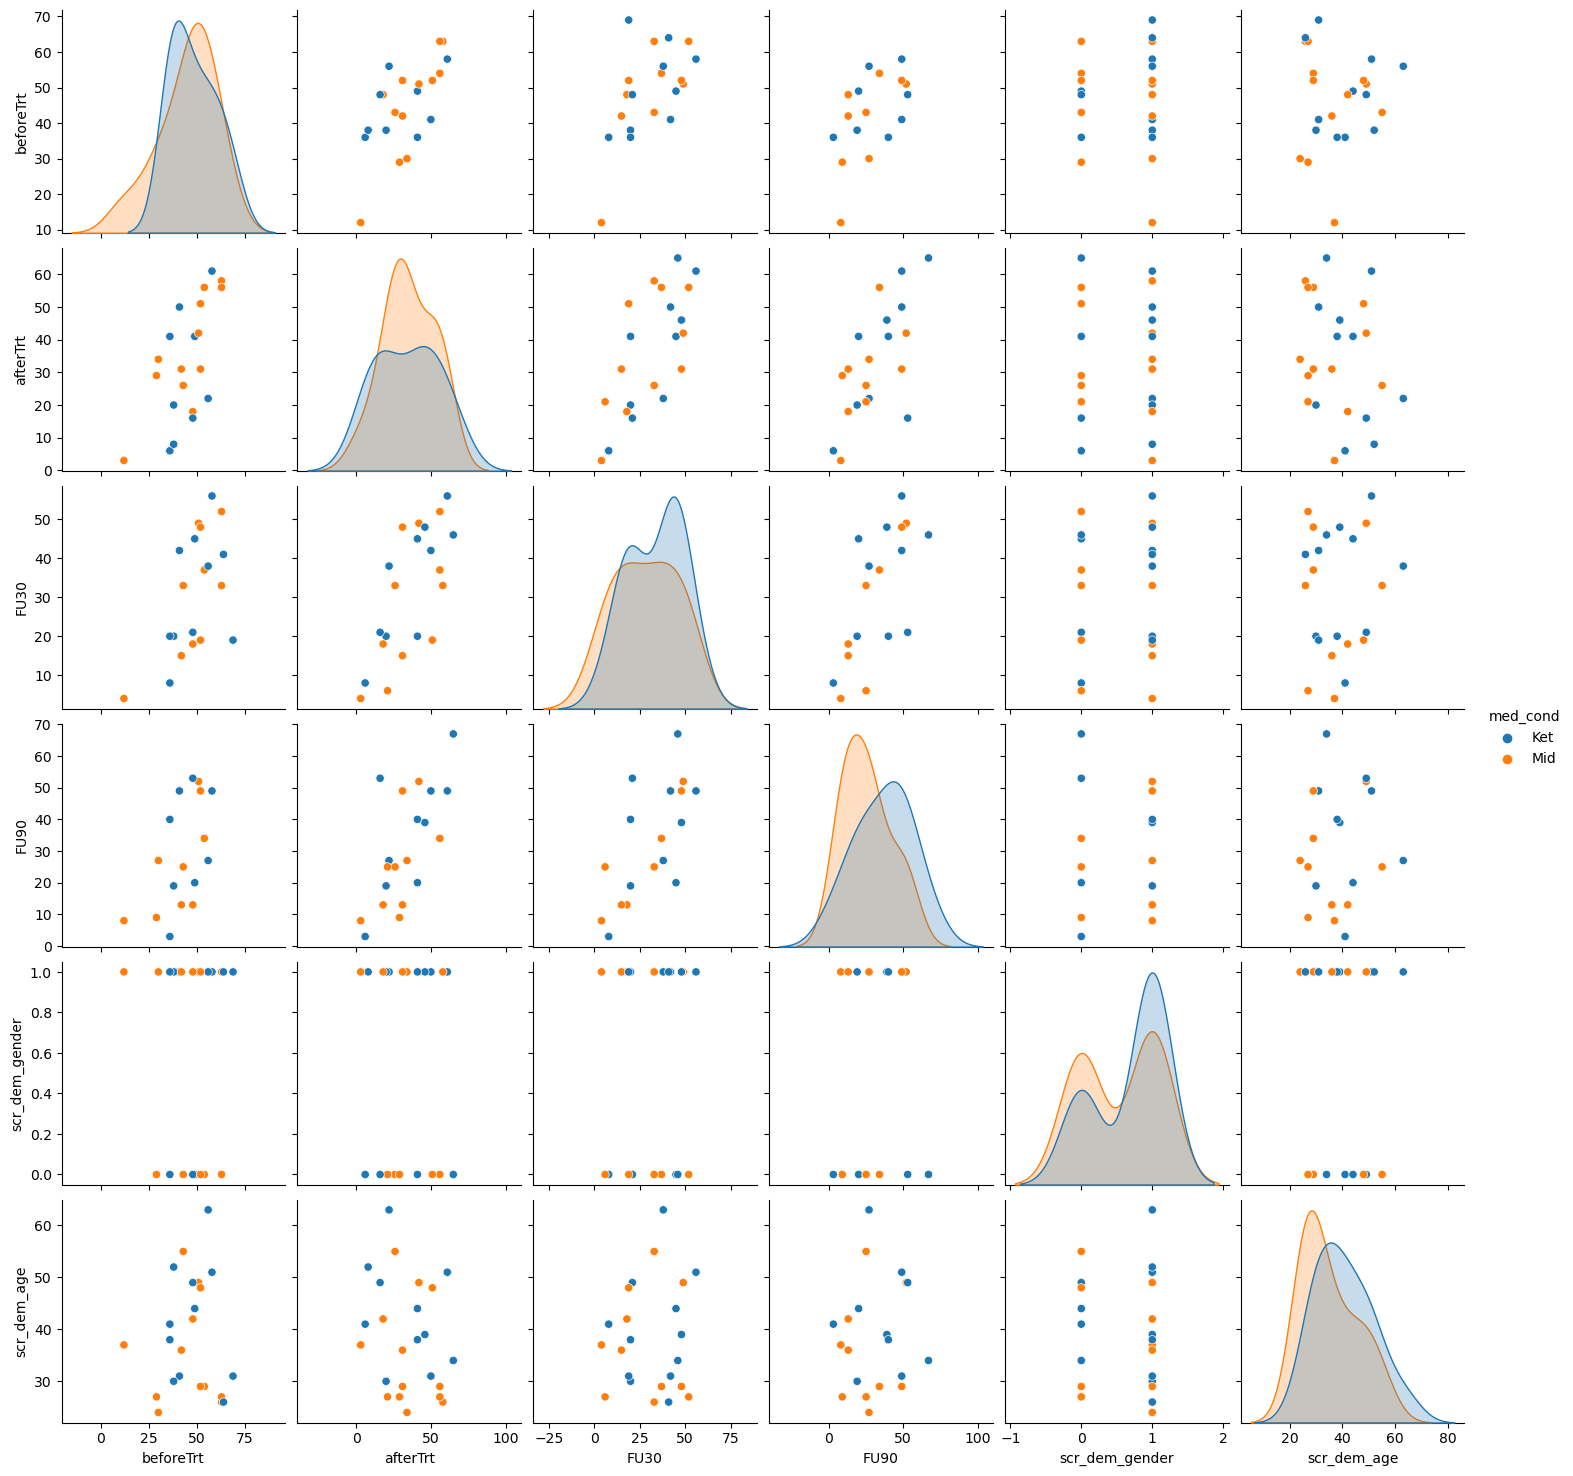

In [12]:
df_clean = df[['scr_id','med_cond','time','pcl5_total']]
# remove screening timepoint - its redundant here
df_clean = df_clean[df_clean.time!='screen'] 
# recategorize time because we removed something
df_clean.time = pd.Categorical(df_clean.time, categories=['beforeTrt','afterTrt','FU30', 'FU90'])
wideDf = df_clean.pivot(index=['scr_id'], columns=['time'], values=['pcl5_total'])
#
wideDf = wideDf.pcl5_total.reset_index()

wideDf = wideDf.merge(df_med, left_on='scr_id', right_on='scr_id', how='outer')
wideDf
sns.pairplot(wideDf, hue="med_cond")

In [13]:
## check changes in symtpoms
wideDf['delta30'] = wideDf.FU30 - wideDf.beforeTrt
print(f'Number of participants improving 5 points or more is {len(wideDf[wideDf.delta30<=-5])}')
print(f'Number of participants improving 10 points or more is {len(wideDf[wideDf.delta30<=-10])}')

Number of participants improving 5 points or more is 15
Number of participants improving 10 points or more is 14


In [14]:
# improvement of 30%
wideDf['improve30p'] = (wideDf.FU30 - wideDf.beforeTrt) / wideDf.beforeTrt

In [15]:
wideDf[['FU30','FU90','med_cond']].groupby('med_cond').describe()

FU30                                                      FU90  \
         count       mean        std  min   25%   50%    75%   max count   
med_cond                                                                   
Ket       12.0  33.666667  15.179731  8.0  20.0  39.5  45.25  56.0  10.0   
Mid       11.0  28.545455  17.189320  4.0  16.5  33.0  42.50  52.0  10.0   

                                                          
          mean        std  min    25%   50%    75%   max  
med_cond                                                  
Ket       36.6  19.219203  3.0  21.75  39.5  49.00  67.0  
Mid       25.5  15.707394  8.0  13.00  25.0  32.25  52.0

In [16]:
# need to scale pcl variable
df_clean['pcl5_total_scaled'] = preprocessing.scale(df_clean.pcl5_total)
df_clean.describe().round(3)

,pcl5_total,pcl5_total_scaled
count,93.000,93.000
mean,35.581,0.000
std,17.377,1.005
min,3.000,-1.885
25%,20.000,-0.901
50%,38.000,0.140
75%,49.000,0.776
max,69.000,1.934


In [ ]:
## Start with simple GLM models (using statsmodel)
glm = smf.mixedlm('pcl5_total_scaled ~ C(time) * C(med_cond)', data=df_clean, groups = df_clean.scr_id, 
                 missing='drop')
model1 = glm.fit()
print(model1.summary())

In [ ]:
# so in simple mixed model we see effect for time after treatment and in 30 and 90 days follow-up
# use pinguoin for ANOVA of the mixed model
pg.mixed_anova(data=df_clean, dv='pcl5_total', within='time', between='med_cond', subject='scr_id').round(3)


## Go Bayes
- Organize indexes and define model
- Try with/without hyperpriors

In [88]:
# set groups as 0 and 1
group = {'Ket': 1,'Mid': 0} 
df_clean['groupIdx'] =[group[item] for item in df_clean.med_cond] 
# set all the rest
df_clean['scr_id'] = df_clean.scr_id.astype('category')
sub_idx = df_clean.scr_id.cat.codes.values # get county category index values (613 x 1) vec with nums [0-7]
print(sub_idx)
n_subs = len(np.unique(df_clean.scr_id))
print(n_subs)
# set time as index also
#df_clean.groupIdx = pd.Categorical(df_clean.groupIdx)
df_clean.time = pd.Categorical(df_clean.time, 
                    categories=['beforeTrt','afterTrt','FU30','FU90'])
timeIDX = df_clean.time.cat.codes.values
print(timeIDX)

[ 0  0  0  0  1  1  1  1  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5  6
  6  7  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11 12 12 12
 12 13 13 13 13 14 14 14 14 15 15 15 15 16 16 16 16 17 17 17 17 18 18 18
 19 19 19 20 20 20 21 21 21 22 22 22 22 23 23 23 23 24 24 24 24 25 25 25
 26 26 26]
27
[0 1 2 3 0 1 2 3 0 1 2 0 1 2 3 0 1 2 3 0 1 2 3 0 1 0 1 2 3 0 1 2 3 0 1 2 3
 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 1 2 3 0 1
 3 0 1 3 0 1 2 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 0 1 2]


In [83]:
# lets define our own model using pymc3
with pm.Model() as model1:
  
    
    a = pm.Normal('a', mu=0, sd=1, shape=n_subs)
    
    sigma = pm.HalfCauchy('sigma', 5, shape=4)
    b = pm.Normal('b', mu=0, sigma=sigma, shape=4) # time
    
    bMed = pm.Normal('bMed', mu=0, sd=1) # two groups
  
    # Model error
    eps = pm.HalfCauchy('eps', 3)

    y_hat = a[sub_idx] + b[timeIDX] + bMed*df_clean.groupIdx 

    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y_hat,
                           sigma=eps, observed=df_clean.pcl5_total)
    
    # difference between
    diff_of_means1 = pm.Deterministic('difference end of treatment', b[1] - b[0])
    diff_of_means2 = pm.Deterministic('difference 30 days', b[2] - b[0])
    diff_of_means3 = pm.Deterministic('difference 90 days', b[3] - b[0])
    # effect size
    effect_size1 = pm.Deterministic('effect size2_1', 
                        abs(diff_of_means1) / eps)
    
    effect_size2 = pm.Deterministic('effect size3_1', 
                        abs(diff_of_means2) / eps)
    
    effect_size3 = pm.Deterministic('effect size4_1', 
                        abs(diff_of_means3) / eps)

    prior_checks = pm.sample_prior_predictive(samples=8000, random_seed=123)
    trace = pm.sample(draws=2000, tune=2000, target_accept=0.9, return_inferencedata=True)

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/pymc3/model.py:1755: ImputationWarning: Data in likelihood contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [likelihood_missing, eps, bMed, b, sigma, a]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 11 seconds.


In [62]:
prior_checks['difference 90 days'].shape

(8000,)

In [84]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],0.323,0.996,-1.533,2.178,0.011,0.010,8570.0,6124.0,1.0
a[1],0.156,1.006,-1.698,2.043,0.011,0.011,8083.0,5726.0,1.0
a[2],0.190,0.964,-1.593,1.997,0.011,0.010,8374.0,5910.0,1.0
a[3],0.161,1.003,-1.745,2.006,0.010,0.011,10533.0,5998.0,1.0
a[4],-0.332,0.984,-2.107,1.587,0.010,0.010,9961.0,5869.0,1.0
a[5],0.055,0.999,-1.885,1.880,0.010,0.012,9873.0,6177.0,1.0
a[6],-0.122,0.990,-1.936,1.767,0.010,0.011,10035.0,6090.0,1.0
a[7],-0.008,0.988,-1.843,1.855,0.010,0.011,9156.0,5578.0,1.0
a[8],0.317,0.972,-1.437,2.191,0.009,0.011,10988.0,5858.0,1.0
a[9],-0.161,0.994,-1.986,1.690,0.010,0.011,10325.0,6191.0,1.0


In [63]:
with model1:
    ppc = pm.sample_posterior_predictive(
        trace, random_seed=124
    )

array([<AxesSubplot:title={'center':'difference end of treatment'}>,
       <AxesSubplot:title={'center':'difference 30 days'}>,
       <AxesSubplot:title={'center':'difference 90 days'}>,
       <AxesSubplot:title={'center':'bMed'}>], dtype=object)

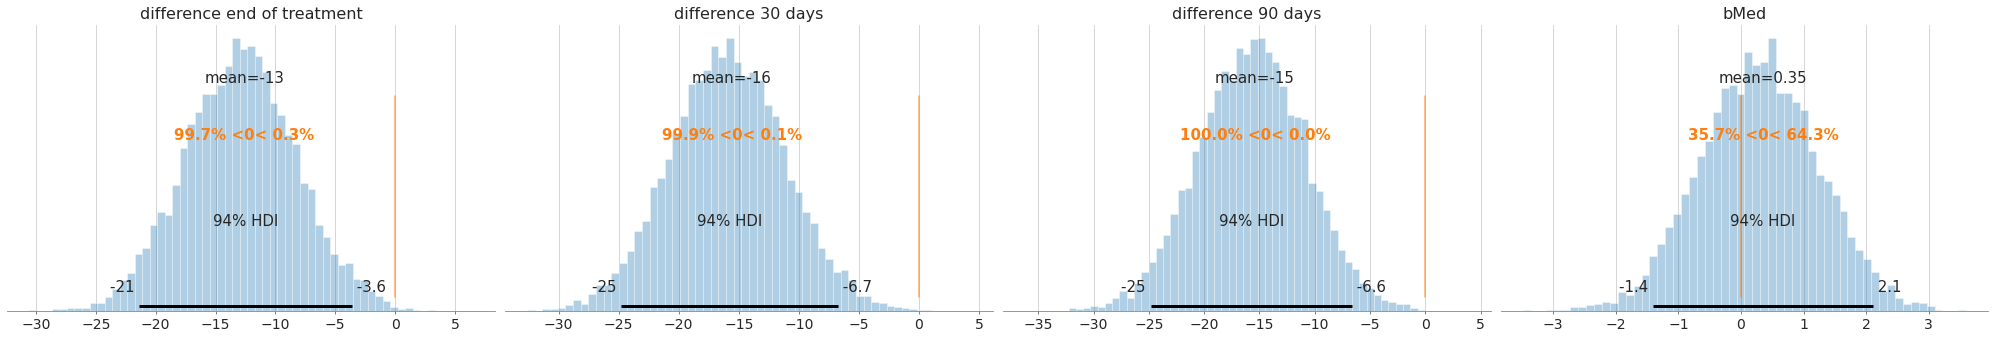

In [64]:
az.plot_posterior(trace, var_names=['difference end of treatment', 'difference 30 days', 'difference 90 days', 'bMed'],
                  ref_val=0,
                 kind='hist')

In [65]:
tr_stack = trace.posterior.stack(draws=('chain','draw'))
tr_stack['difference 90 days'].values.shape

(8000,)

In [57]:
tr_stack.b.values.shape

(4, 8000)

# BF

In [67]:
from scipy import stats
posterior = stats.kde.gaussian_kde(tr_stack['difference 30 days'].values)
prior = stats.kde.gaussian_kde(prior_checks['difference 30 days'])
prior_h0 = prior(0)  # this gives the pdf at point delta = 0
posterior_h0 =posterior(0)  # this gives the pdf at point delta = 0
BF01 =   prior_h0  / posterior_h0
print("the Bayes Factor is %.5f" % (BF01))

the Bayes Factor is 5.00533


In [24]:
prior_checks['b'][:,0]


array([-6.65193581, -4.84307173, -2.77774791, ..., 13.41755393,
        3.66683969,  8.20851172])

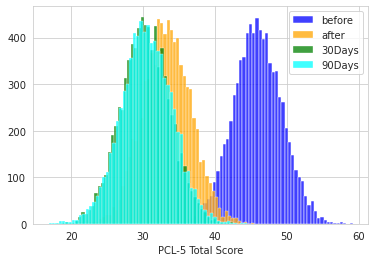

In [69]:
sns.histplot(tr_stack["b"][0,:], color = 'blue', label='before')
sns.histplot(tr_stack["b"][1,:], color = 'orange', label = 'after')
sns.histplot(tr_stack["b"][2,:].values, color = 'green', label = '30Days')
sns.histplot(tr_stack["b"][3,:].values, color = 'cyan', label = '90Days')
plt.xlabel('PCL-5 Total Score')
plt.ylabel('')
plt.legend()
plt.savefig('histPlot_symptomChange.png', dpi=300, bbox_inches='tight')

## Plotting

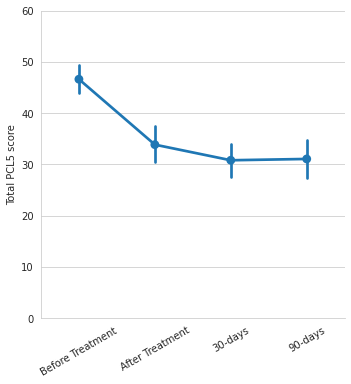

In [120]:
## Plot symtpoms
g = sns.catplot(y='pcl5_total',x='time', data=df_clean, kind='point', ci=68)
g.set_xlabels("Time")
g.set_xticklabels(
    labels=["Before Treatment", "After Treatment", "30-days", "90-days"], rotation=30)
g.set_xlabels('')
g.set_ylabels("Total PCL5 score")
g.set(ylim=[0,60])

g.savefig("SymtpomsChange.png", dpi=300)

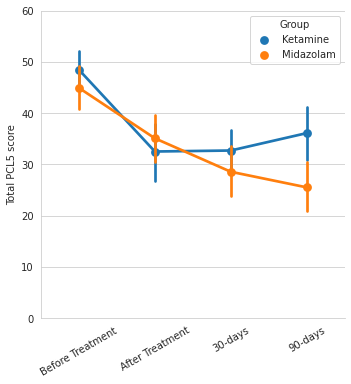

In [119]:
## Plot symtpoms
g = sns.catplot(y='pcl5_total',x='time', hue='med_cond', data=df_clean, kind='point', ci=68,
               hue_order=['Ket','Mid'], legend_out=False)
g.set_xlabels("Time")
g.set_xticklabels(
    labels=["Before Treatment", "After Treatment", "30-days", "90-days"], rotation=30)
g.set_xlabels('')
g.set_ylabels("Total PCL5 score")
g._legend.set_title("Group")
g.set(ylim=[0,60])
new_labels = ['Ketamine', 'Midazolam']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.savefig("SymtpomsChangeGroup.png", dpi=300)

# Interaction model

In [93]:
# lets define our own model using pymc3
with pm.Model() as model2:
  
    
    a = pm.Normal('a', mu=0, sd=1, shape=n_subs)
  
    b = pm.Normal('b', mu=0, sd=1, shape=4) # time
    
    bMed = pm.Normal('bMed', mu=0, sd=1) # two groups
    interaction = pm.Normal('interaction', mu=0, sd=5, shape=4)
    # Model error
    eps = pm.HalfCauchy('eps', 5)

    y_hat = a[sub_idx] + b[timeIDX] + bMed*df_clean.groupIdx + interaction[timeIDX]*df_clean.groupIdx

    # Data likelihood
    likelihood = pm.Normal('likelihood', mu=y_hat,
                           sigma=eps, observed=df_clean.pcl5_total)
        
    prior_checks = pm.sample_prior_predictive(samples=2000, random_seed=123)
    trace2 = pm.sample(draws=2000, tune=2000, target_accept=0.9, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [likelihood_missing, eps, interaction, bMed, b, a]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 10 seconds.


In [94]:
az.summary(trace2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],0.141,1.001,-1.628,2.125,0.009,0.011,11187.0,6076.0,1.0
a[1],0.130,1.003,-1.716,2.048,0.009,0.012,12192.0,6345.0,1.0
a[2],0.137,1.032,-1.882,2.006,0.010,0.012,11265.0,5888.0,1.0
a[3],0.131,1.005,-1.774,2.082,0.008,0.012,14956.0,5748.0,1.0
a[4],0.004,0.996,-1.792,1.933,0.009,0.012,12283.0,5902.0,1.0
a[5],0.097,0.997,-1.779,1.972,0.010,0.011,10803.0,5934.0,1.0
a[6],0.021,0.987,-1.822,1.854,0.010,0.011,10618.0,6748.0,1.0
a[7],0.093,1.007,-1.778,2.048,0.009,0.012,12073.0,5924.0,1.0
a[8],0.122,0.996,-1.747,2.010,0.009,0.011,11499.0,5890.0,1.0
a[9],0.074,1.008,-1.797,1.998,0.009,0.012,13763.0,5819.0,1.0


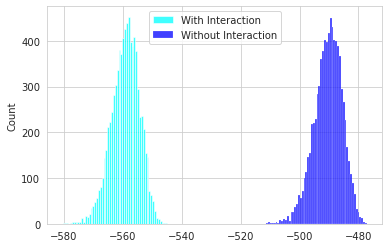

In [101]:
logP = trace2.sample_stats.lp.stack(draws=('chain','draw'))
logP1 = trace.sample_stats.lp.stack(draws=('chain','draw'))
sns.histplot(logP, label='With Interaction', color='cyan')
sns.histplot(logP1, label = "Without Interaction", color='blue')
plt.legend()
#plt.vlines(np.mean(logP), 0, 250, color='red')

# BDI

In [46]:
# need to substract 1 from each bdi scor (should be 0-3 not 1-4) over column with bdi scores
filter_col = [col for col in df if col.startswith('bdi')]
filter_col = filter_col[:-1] # remove bdi total
# no go over every column and substract 1
for col in filter_col:
    df[col] = df[col] - 1


In [49]:
df['totalBDI'] = df[filter_col].sum(axis=1, skipna=False) 
# set skipna to false to keep NA in total score where some cell is missing
dfBDI = df[['scr_id','totalBDI','med_cond','time']]
dfBDI.head()

,scr_id,totalBDI,med_cond,time
1,KPE008,33.0,Ket,beforeTrt
2,KPE008,31.0,Ket,afterTrt
3,KPE008,45.0,Ket,FU30
4,KPE008,30.0,Ket,FU90
6,KPE1223,21.0,Ket,beforeTrt


In [51]:
df['scr_id'].values

array(['KPE008', 'KPE008', 'KPE008', 'KPE008', 'KPE1223', 'KPE1223',
       'KPE1223', 'KPE1223', 'KPE1253', 'KPE1253', 'KPE1253', 'KPE1263',
       'KPE1263', 'KPE1263', 'KPE1263', 'KPE1293', 'KPE1293', 'KPE1293',
       'KPE1293', 'KPE1307', 'KPE1307', 'KPE1307', 'KPE1307', 'KPE1315',
       'KPE1315', 'KPE1322', 'KPE1322', 'KPE1322', 'KPE1322', 'KPE1339',
       'KPE1339', 'KPE1339', 'KPE1339', 'KPE1343', 'KPE1343', 'KPE1343',
       'KPE1343', 'KPE1351', 'KPE1351', 'KPE1351', 'KPE1351', 'KPE1356',
       'KPE1356', 'KPE1356', 'KPE1356', 'KPE1364', 'KPE1364', 'KPE1364',
       'KPE1364', 'KPE1369', 'KPE1369', 'KPE1369', 'KPE1369', 'KPE1387',
       'KPE1387', 'KPE1387', 'KPE1387', 'KPE1390', 'KPE1390', 'KPE1390',
       'KPE1390', 'KPE1403', 'KPE1403', 'KPE1403', 'KPE1403', 'KPE1419',
       'KPE1419', 'KPE1419', 'KPE1419', 'KPE1464', 'KPE1464', 'KPE1464',
       'KPE1468', 'KPE1468', 'KPE1468', 'KPE1480', 'KPE1480', 'KPE1480',
       'KPE1499', 'KPE1499', 'KPE1499', 'KPE1561', 'KPE

In [53]:
# go over all bdi and see if there's a score above 3
# not total, but each column with bdi item
for col in filter_col:
    print(f'Number of participants with score above 3 in {col} is {len(df[df[col]>3])}')


Number of participants with score above 3 in bdi_1_sadness is 0
Number of participants with score above 3 in bdi_2_pessimism is 0
Number of participants with score above 3 in bdi_3_pastfailure is 0
Number of participants with score above 3 in bdi_4_lossofpleasure is 0
Number of participants with score above 3 in bdi_5_guiltyfeelings is 0
Number of participants with score above 3 in bdi_6_punishmentfeelings is 0
Number of participants with score above 3 in bdi_7_selfdislike is 0
Number of participants with score above 3 in bdi_8_selfcriticalness is 0
Number of participants with score above 3 in bdi_9_suicidalthoughts is 0
Number of participants with score above 3 in bdi_10_crying is 0
Number of participants with score above 3 in bdi_11_agitation is 0
Number of participants with score above 3 in bdi_12_lossofinterest is 0
Number of participants with score above 3 in bdi_13_indecisiveness is 0
Number of participants with score above 3 in bdi_14_worthlessness is 0
Number of participants wi

In [50]:
dfBDI.groupby(['med_cond','time']).describe()

/var/folders/b9/lbb6xc5s5cbgvhhqy321k9th0000gn/T/ipykernel_11689/783837418.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfBDI.groupby(['med_cond','time']).describe()


totalBDI                                                 \
                      count       mean        std   min   25%   50%    75%   
med_cond time                                                                
Ket      beforeTrt     11.0  26.909091   6.057302  17.0  22.5  27.0  32.00   
         afterTrt      14.0  17.142857  12.787356   0.0   6.5  15.0  25.25   
         FU30          13.0  21.461538  11.398943   1.0  15.0  22.0  28.00   
         FU90          10.0  21.300000  10.893933   3.0  15.5  22.0  29.00   
Mid      beforeTrt     12.0  26.666667  12.115605   8.0  16.0  24.5  36.50   
         afterTrt      13.0  17.846154  10.486866   1.0   9.0  22.0  26.00   
         FU30          10.0  15.200000  11.496859   4.0   6.0  10.0  25.00   
         FU90           9.0  15.666667  16.062378   2.0   4.0   8.0  30.00   

                          
                     max  
med_cond time             
Ket      beforeTrt  36.0  
         afterTrt   44.0  
         FU30       45.0  
         FU90       38.0  
Mid      beforeTrt  44.0  
         afterTrt   31.0  
         FU30       36.0  
         FU90       46.0

In [55]:
# remove screening
dfBDI_clean = dfBDI[dfBDI.time!='screen']
dfBDI_clean

,scr_id,totalBDI,med_cond,time
1,KPE008,33.0,Ket,beforeTrt
2,KPE008,31.0,Ket,afterTrt
3,KPE008,45.0,Ket,FU30
4,KPE008,30.0,Ket,FU90
6,KPE1223,21.0,Ket,beforeTrt
...,...,...,...,...
120,KPE1587,6.0,Ket,afterTrt
121,KPE1587,15.0,Ket,FU30
123,KPE1612,38.0,Mid,beforeTrt
124,KPE1612,23.0,Mid,afterTrt


In [56]:
# run mixed level analysis
glm2 = smf.mixedlm('totalBDI ~ C(time) * C(med_cond)', data=dfBDI_clean, groups ='scr_id', 
                 missing='drop')
model2 = glm2.fit()
print(model2.summary())

/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                                 Mixed Linear Model Regression Results
Model:                             MixedLM                 Dependent Variable:                 totalBDI
No. Observations:                  92                      Method:                             REML    
No. Groups:                        27                      Scale:                              61.1918 
Min. group size:                   1                       Log-Likelihood:                     inf     
Max. group size:                   4                       Converged:                          No      
Mean group size:                   3.4                                                                 
-------------------------------------------------------------------------------------------------------
                                         Coef.     Std.Err.     z    P>|z|     [0.025         0.975]   
-------------------------------------------------------------------------------------------------

/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:162: RuntimeWarning: invalid value encountered in scalar subtract
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:396: RuntimeWarning: invalid value encountered in scalar subtract
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: M

In [57]:
pg.mixed_anova(dfBDI_clean, dv = 'totalBDI',between='med_cond',within='time', subject='scr_id')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,med_cond,186.482143,1,12,186.482143,0.480018,0.501603,0.038463,NaN
1,time,972.714286,3,36,324.238095,5.595784,0.002957,0.318018,0.863375
2,Interaction,113.827381,3,36,37.942460,0.654821,0.585188,0.051745,NaN


Improvement but not specific to each of the groups

/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/orduek/miniconda3/envs/analysis/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/var/folders/b9/lbb6xc5s5cbgvhhqy321k9th0000gn/T/ipykernel_11689/3650518860.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.catplot(x='time',y='totalBDI',hue='med_cond', data=dfBDI_clean, ki

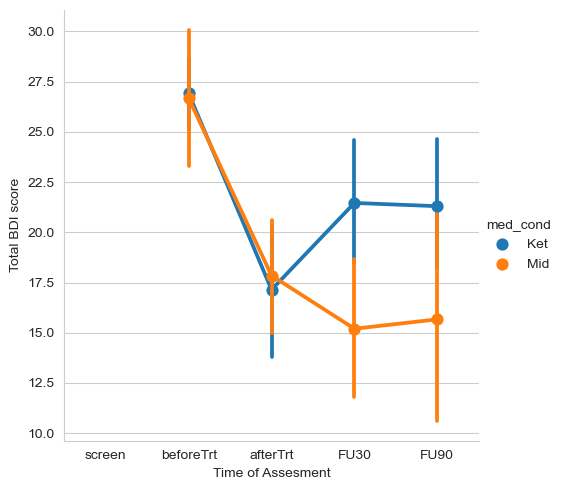

In [61]:
## Plot symtpoms
sns.set_style("whitegrid")
ax = sns.catplot(x='time',y='totalBDI',hue='med_cond', data=dfBDI_clean, kind='point', ci=68, n_boot=5000,
           )
ax.set_ylabels("Total BDI score")
ax.set_xlabels("Time of Assesment")
#ax.savefig("SymtpomsChangeBDI.png", dpi=300)